<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Получение-данных-из-файла,-изучение-данных" data-toc-modified-id="Получение-данных-из-файла,-изучение-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Получение данных из файла, изучение данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Получение данных из файла, изучение данных

In [1]:
import pandas as pd #импортируем библиотеку pandas
import numpy as np
import seaborn
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv',sep='\t') # открываем файл с данными и передаем его в переменную

In [3]:
data.info()
display(data.head())
for column in data.columns:
    print(data[column].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


10    1798
9     1725
20    1694
8     1585
7     1521
6     1482
11    1362
5     1301
12    1225
0     1059
13    1015
4      986
14     986
15     948
1      872
3      769
16     761
17     650
18     642
2      640
19     603
23      16
21      12
24       8
22       8
26       5
28       4
32       4
29       3
50       3
27       2
35       2
30       2
31       2
39       1
25       1
42       1
37       1
Name: total_images, dtype: int64
4500000.0     342
3500000.0     291
4000000.0     260
4300000.0     260
4200000.0     259
             ... 
10430000.0      1
9917600.0       1
3180500.0       1
7297000.0       1
4386000.0       1
Name: last_price, Length: 2978, dtype: int64
45.00     419
42.00     383
60.00     347
31.00     346
44.00     345
         ... 
44.24       1
56.85       1
37.92       1
115.60      1
55.06       1
Name: total_area, Length: 2182, dtype: int64
2018-02-01T00:00:00    368
2017-11-10T00:00:00    240
2017-10-13T00:00:00    124
2017-09-27T00:00:00    111

**Вывод:**

В датасете всего 23699 строк
Все столбцы имеют корректные зназвания, за исключением одного -"cityCenters_nearest", его стоит переименовать, используя "змеиный регистр": city_сenters_nearest.

Обнаружены недостающие значения в столбцах:

- rooms                   23699  значений, из которых 197 нулевых- это может означать, что у квартир свободная планировка
- ceiling_height          14504 39% значений не указаны, по неизвестным причинам(напр.,не знают, не сочли важным указывать), высота потолков важный показатель при продаже квартир, пустые значения необходимо восстановить
- floors_total            23613 не хватает около 0,3% значений, оставляем как есть
- living_area             21796 пропусков 8%, жилая площадь важный показатель. Восстановим отсутствующие значения исходя из медианных значений, сгруппировав остальные значения по общей площади и по наличию балкона, т.к. он не входит в жилую площадь
- is_apartment            2775 11,7% значений имеют отметку апартаметы (50 Да, 2125 нет)
- kitchen_area            21421 9,6% пустых значений по площади кухни, определим недостающие значение по медиане сгруппированных значений по площади и количеству комнат
- balcony                 12180 48,6% пустых значений по наличию балкона, примем пустые значения как отстутсвие балкона
- locality_name           23650 0,2% не имеют названия населенного пункта, что странно, возможно данные потеряны
- airports_nearest        18157 данные получены автоматически на основе картографических данных
- cityCenters_nearest     18180 данные получены автоматически на основе картографических данных
- parks_around3000        18181 данные получены автоматически на основе картографических данных
- parks_nearest           8079 данные получены автоматически на основе картографических данных
- ponds_around3000        18181 данные получены автоматически на основе картографических данных
- ponds_nearest           9110 данные получены автоматически на основе картографических данных
- days_exposition         20518 13,4% данных не имют срока размещения объявлений, возможно на момент проведения среза объявления были еще действующими.

Ознакомившись со значениями каждого из столбцов можно сделать вывод, что многие значения стобцов стоит преобразовать из float64 в int64, также требуются и другие преобразования, изменим тип значений следующих столбов:

- last_price              23699 non-null float64 преобразовать в int
- first_day_exposition    23699 non-null object преобразовать в дату
- floors_total            23613 non-null float64  преобразовать в int
- is_apartment            2775 non-null object преобразовать в bool
- balcony                 12180 non-null float64 преобразовать в int
- airports_nearest        18157 non-null float64 преобразовать в int
- cityCenters_nearest     18180 non-null float64 преобразовать в int
- parks_around3000        18181 non-null float64 преобразовать в int
- parks_nearest           8079 non-null float64  преобразовать в int
- ponds_around3000        18181 non-null float64 преобразовать в int
- ponds_nearest           9110 non-null float64  преобразовать в int
- days_exposition         20518 non-null float64 преобразовать в int

## Предобработка данных

Изменим наименовние стобца cityCenters_nearest:

In [4]:
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest'})
data.columns # проверим переименование

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Найдем пропущенные значения в датасете применив метод isna и выведем их количество до преобразования:

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

1. Предполагаем, что квартиры с одинаковым количеством комнат и одинаковой площадью могут иметь одинаковые по площади кухни. Заполним отсутствующие значения в столбце "kitchen_area" медианными значениями, сгруппировав по общей площади и количеству комнат. 
2. Высота потолков квартир в одинаковых домах одна. Предположим, что в каждом населенном пункте, дома одинаковой этажности схожи. Заполним отсутствующие значения в столбцах "ceiling_heigh" медианными значениями, сгруппировав значения по наименованию населенного пункта и высотности домов. 
3. Жилая площадь в квартире в одинаковых домах может быть одна, однако может зависеть от наличия балкона в квартире, площадь которого не входит жилую. Поэтому для заполнения отсутствующих значений найдем медианные значения, сгруппировав значения по наименованию населенного пункта и высотности домов, а также наличию балкона в квартире.
4. Предварительно пропуски значений в столбце "balcony" заменим на 0, предполагая, что в объявлении балкон не указан по причине его отсутствия.

In [6]:
data['ceiling_height'] = data['ceiling_height'].fillna(data.groupby(['locality_name','floors_total'])['ceiling_height'].transform('median'))
data['kitchen_area'] = data['kitchen_area'].fillna(data.groupby(['total_area','rooms'])['kitchen_area'].transform('median'))
data['balcony'] = data['balcony'].fillna(0)
data[data['balcony'] > 1]['living_area'].mean()
data['living_area'] = data['living_area'].fillna(data.groupby(['locality_name','floors_total','balcony'])['living_area'].transform('median'))
data.isna().sum() # проверим количество пропусков после преобразований

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height            503
floors_total               86
living_area               156
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area              421
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Количество пропущенных значений значительно сократилось, дальнейшая замена пропусков в данных столбцах будет не логична. 

Столбец "is_apartment" имеет 2775 значений, что составляет 11,7% от общего количества строк имеют отметку апартаметы.


In [7]:
print(data.pivot_table(index='is_apartment', values='total_area',aggfunc='count'))

              total_area
is_apartment            
False               2725
True                  50


Апартаменты реже продаются на рынке и обычно такой вид жилья имеет стоимость ниже обычной квартиры, поэтому продавец, как правило, указывает о такой особенности своей недвижимости, предполагаем, что отсутствующие значения появились ввиду того, что продавец не указывал этот параметр, т.к. выставлял объявление по продаже обычной квартиры, не апартаментов. Заменим все пропуски на значение "False".

In [8]:
data['is_apartment'] = data['is_apartment'].fillna('False')

Произведем поиск дубликатов в столбце locality_name

In [9]:
print(len(data['locality_name'].unique())) #подсчитаем количество уникальных наименований населенных пунктов
data['locality_name'].unique()# просмотрим значения

365


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

В значенияк столбца используются слова "поселок" и "посёлок", что может рождать дубликаты, произведем замену "ё" на "е".
Также в значениях столбцов используются наименования населенных пунктов, такие как "деревня", "поселок", "поселок городского типа" и др, уберем все такие значения, оставив только само наименование населенного пункта. Вероятность того в Ленинградской области есть населенные пункты с одинаковыми наименованиями крайне мала.
Подсчитаем количество уникальных значений после преобразований.

In [10]:
data['locality_name'] = data['locality_name'].str.replace('ё','е')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа ','')
data['locality_name'] = data['locality_name'].str.replace('городской поселок ','')
data['locality_name'] = data['locality_name'].str.replace('поселок при железнодорожной станции ','')
data['locality_name'] = data['locality_name'].str.replace('поселок станции ','')
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок ','')
data['locality_name'] = data['locality_name'].str.replace('поселок ','')
data['locality_name'] = data['locality_name'].str.replace('деревня ','')
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество ','')
data['locality_name'] = data['locality_name'].str.replace('село ','')
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество ','')
print(len(data['locality_name'].unique())) 
data['locality_name'].unique() # просмотрим значения

306


array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

Неплохо, избавились от 59 дубликатов.

Преобразуем значение столбца 'first_day_exposition' к типу datetime:

In [11]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format ='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition'].head() #проверим отображение даты


0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

В столбце "days_exposition" присутствуют 13,4% пропсуков. Можно было бы предположить, что на момент проведения среза, объявления были еще действующими, поэтому значения пусты. Однако судя по датам размещения объявлений(от 2014 до 2019 года) это предполежение неверное.

In [12]:
data[data['days_exposition'].isna()].sort_values('first_day_exposition')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3873,7,20100000.0,117.6,2014-11-27,3,3.000,8.0,62.5,7,False,...,21.5,0.0,Санкт-Петербург,39393.0,11096.0,1.0,537.0,0.0,NaN,NaN
15857,6,25000000.0,145.2,2014-11-27,3,2.600,5.0,60.7,5,False,...,40.2,0.0,Санкт-Петербург,36779.0,14931.0,0.0,NaN,0.0,NaN,NaN
3291,8,8200000.0,52.5,2014-11-27,1,3.000,8.0,21.5,2,False,...,15.1,0.0,Санкт-Петербург,39393.0,11096.0,1.0,537.0,0.0,NaN,NaN
6922,17,29999000.0,133.5,2014-12-08,3,3.000,15.0,71.7,12,False,...,19.8,2.0,Санкт-Петербург,31656.0,8733.0,1.0,562.0,1.0,522.0,NaN
15614,3,19400000.0,117.7,2014-12-09,3,3.000,8.0,62.6,5,False,...,21.3,0.0,Санкт-Петербург,39393.0,11096.0,1.0,537.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12003,10,950000.0,37.1,2019-05-03,1,NaN,4.0,17.0,4,False,...,8.4,2.0,Курковицы,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17551,7,3200000.0,45.6,2019-05-03,2,2.525,5.0,30.9,5,False,...,5.6,1.0,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15881,9,2100000.0,35.8,2019-05-03,1,2.500,5.0,18.0,5,False,...,7.0,1.0,Ленинское,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13993,6,3300000.0,43.0,2019-05-03,1,2.600,17.0,18.0,3,False,...,10.5,0.0,Колпино,28554.0,34341.0,0.0,NaN,3.0,287.0,NaN


Заполнение такого числа пропусков может исказить структуру данного столбца, поэтому оставим пропуски без изменений.

Появление пропусков в дата сете можно обосновать тем, что при внеснии данных продавец не указал все параметры по тем или иниым причинам. Этого можно было избежать, если система не позволяла разместить объявление без обязательного заполнения необходимых данных. Как показывает практика, продавец заинтересованный в продаже своей квартиры старается указать как можно больше параметров и по максимуму описывает объект, фейковые объявления ввиду их большого количества обычно содержат минимальную информацию, возможно, заполняются только обязательные из полей. Также здесь может присутствовать человеческий фактор, когда продавец не указывает все данные(не знает, не умеет, не хочет и т.п.) 

У нас остался ряд столбцов, значения которых стоит преобразовать к целочисленному типу значений. Операции с целочисленными значениями требуют меньших ресурсов при проведении расчетов, нежели чем с вещественными. Вещественные значения оставляем только  в тех столбцах, где точная величина важна, какрактеристика квартиры, например, площадь или высота потолка.

(Значение столбца "city_centers_nearest" не переводим в Int64, т.к. это позволит в дальнейшем избежать сложности с построением диаграмм впереди в проекте)

Передадим в новую переменную список стобцов, значения которых нужно преобразовать в int:

In [13]:
column_to_convert = ['last_price', 'balcony','floors_total','airports_nearest', 'parks_around3000','parks_nearest','ponds_around3000','ponds_nearest','days_exposition']
for item in column_to_convert:
    data[item] = data[item].round() # перед преобразованием нужно округлить вещественное число, отбросив дробную часть, если таковая имеется
    data[item] = data[item].astype('Int64') # тип Int64 позволит преобразовать значения столбцов в целочисленные, в т.ч в которых есть пропуски
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  Int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23196 non-null  float64       
 6   floors_total          23613 non-null  Int64         
 7   living_area           23543 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23278 non-null  float64       
 13  balcony         

## Расчёты и добавление результатов в таблицу

Создадим новый столбец и запишем в него значения расчитанной цены квадратного метра каждой квартиры

In [14]:
data['price_square_meter'] = data['last_price']/data['total_area']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,0,Санкт-Петербург,18863,16028.0,1,482,2,755,<NA>,120370.37037
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,2,Шушары,12817,18603.0,0,<NA>,0,<NA>,81,82920.792079
2,10,5196000,56.0,2015-08-20,2,2.60,5,34.3,4,False,...,0,Санкт-Петербург,21741,13933.0,1,90,2,574,558,92785.714286
3,0,64900000,159.0,2015-07-24,3,2.60,14,26.8,9,False,...,0,Санкт-Петербург,28098,6800.0,2,84,3,234,424,408176.100629
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,0,Санкт-Петербург,31856,8098.0,2,112,1,48,121,100000.0


Добавим в таблицу столбцы, значения которых будут содержать: день недели, месяц и год публикации объявления:

In [15]:
data['week_day'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,week_day,month,year
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,16028.0,1,482,2,755,<NA>,120370.37037,3,3,2019
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,18603.0,0,<NA>,0,<NA>,81,82920.792079,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.60,5,34.3,4,False,...,13933.0,1,90,2,574,558,92785.714286,3,8,2015
3,0,64900000,159.0,2015-07-24,3,2.60,14,26.8,9,False,...,6800.0,2,84,3,234,424,408176.100629,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,8098.0,2,112,1,48,121,100000.0,1,6,2018


Создадим новый столбец этаж квартиры и запишем в него значения: 1-первый, 2-последний, 0-другой:

In [16]:
print(data['floors_total'].isna().value_counts())
data.dropna(subset=['floors_total'], inplace=True)
data['floors_total'].isna().value_counts()

False    23613
True        86
Name: floors_total, dtype: int64


False    23613
Name: floors_total, dtype: int64

In [17]:
def check_floor(row):

    if (row['floors_total'] == 1) | (row['floor'] == 1):
             return 1
    else:
        if  row['floors_total'] == row['floor']:
            return 2
        else:
            return 0
data['flat_floor'] = data.apply(check_floor,axis=1)           
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,week_day,month,year,flat_floor
0,20,13000000,108.00,2019-03-07,3,2.700,16,51.00,8,False,...,1,482,2,755,<NA>,120370.37037,3,3,2019,0
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,False,...,0,<NA>,0,<NA>,81,82920.792079,1,12,2018,1
2,10,5196000,56.00,2015-08-20,2,2.600,5,34.30,4,False,...,1,90,2,574,558,92785.714286,3,8,2015,0
3,0,64900000,159.00,2015-07-24,3,2.600,14,26.80,9,False,...,2,84,3,234,424,408176.100629,4,7,2015,0
4,2,10000000,100.00,2018-06-19,2,3.030,14,32.00,13,False,...,2,112,1,48,121,100000.0,1,6,2018,0
5,10,2890000,30.40,2018-09-10,1,2.625,12,14.40,5,False,...,<NA>,<NA>,<NA>,<NA>,55,95065.789474,0,9,2018,0
6,6,3700000,37.30,2017-11-02,1,2.600,26,10.60,6,False,...,0,<NA>,0,<NA>,155,99195.710456,3,11,2017,0
7,5,7915000,71.60,2019-04-18,2,2.750,24,19.00,22,False,...,0,<NA>,0,<NA>,<NA>,110544.692737,3,4,2019,0
8,20,2900000,33.16,2018-05-23,1,2.650,27,15.43,26,False,...,<NA>,<NA>,<NA>,<NA>,189,87454.764777,2,5,2018,0
9,18,5400000,61.00,2017-02-26,3,2.500,9,43.60,7,False,...,0,<NA>,0,<NA>,289,88524.590164,6,2,2017,0


Создадим 2 столбца и заполним их значениями: 

1. Отношение жилой и общей площади
2. Отношение площади кухни к общей площади.

In [18]:
data['living_to_total_area'] = data['living_area']/data['total_area']
data['kitchen_to_total_area'] = data['kitchen_area']/data['total_area']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,week_day,month,year,flat_floor,living_to_total_area,kitchen_to_total_area
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2,755,<NA>,120370.37037,3,3,2019,0,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,0,<NA>,81,82920.792079,1,12,2018,1,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.60,5,34.3,4,False,...,2,574,558,92785.714286,3,8,2015,0,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,2.60,14,26.8,9,False,...,3,234,424,408176.100629,4,7,2015,0,0.168553,0.094340
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1,48,121,100000.0,1,6,2018,0,0.320000,0.410000


## Исследовательский анализ данных

Изучим параметры квартир: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.

count    23613.000000
mean        60.340678
std         35.648988
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

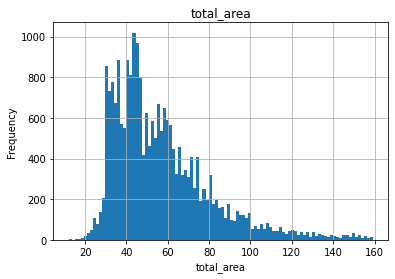

Стоит обратить внимание на возможные выбросы значений: total_area = 900.0


count    2.361300e+04
mean     6.540555e+06
std      1.090172e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

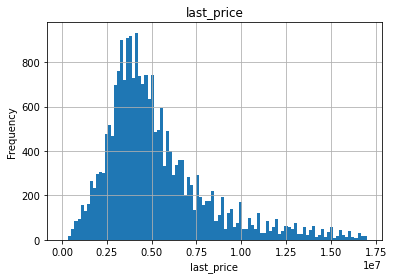

Стоит обратить внимание на возможные выбросы значений: last_price = 763000000.0


count    23613.000000
mean         2.071147
std          1.078380
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

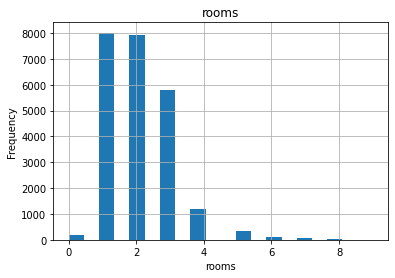

Стоит обратить внимание на возможные выбросы значений: rooms = 19.0


count    23187.000000
mean         2.739511
std          1.017360
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

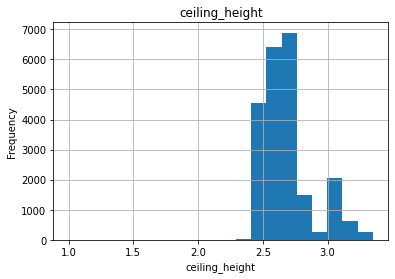

Стоит обратить внимание на возможные выбросы значений: ceiling_height = 100.0


In [19]:
values_to_reserch = ['total_area','last_price','rooms','ceiling_height']
bins_of_values_to_reserch= [100,100,20,20]
c=0
for value in values_to_reserch:
    table_stats = data[value].describe()   
    display(table_stats)
    fig, ax = plt.subplots()
    data[value].plot(grid = True, kind = 'hist', bins=bins_of_values_to_reserch[c], range=(table_stats['min'],table_stats['75%']+(table_stats['75%']-table_stats['25%'])*3), title = value)
    ax.set_xlabel(value)
    plt.show()
    print('Стоит обратить внимание на возможные выбросы значений:', values_to_reserch[c],'=', table_stats['max'])
    c+=1


**Выводы:**

1. Выборка значений столбца "total_area" имеет выбросы, это видно по значению стандартного отклонения (оно далеко от ср.значения) и по тому, что ср.значение больше медианы. Максимальная площадь квартиры 900 кв. метров, явная аномалия.Минимальная площадь в 12 квадратных метров допустима в современных реалиях.

2. Выборка значений столбца "last_price" имеет выбросы, это видно по значению стандартного отклонения (оно далеко от ср.значения) и по тому, что ср.значение больше медианы. Максимальная цена квартиры 763 000 000 руб, явная аномалия.

3. Выборка значений столбца "rooms" имеет выбросы, это видно по значению стандартного отклонения (оно далеко от ср.значения) 19-ти  комнатная квартира явная аномалия. Предполагаем, что значение 0 комнат говорит о том, что в квартире свободная планировка.

4. Выборка значений столбца "ceiling_height" имеет выбросы, это видно по значению стандартного отклонения (оно далеко от ср.значения). Высота потолка квартиры в 100 метров или 1 метр - явные аномалии.

**Изучаем время продажи квартиры.**

Построим гистограмму. Определим среднее и медиану используя метод describe()

count    20441.000000
mean       180.884839
std        219.685543
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


Text(0.5, 1.0, 'days_exposition')

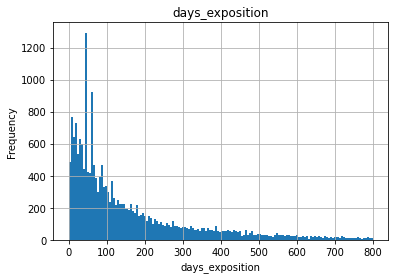

In [20]:
print(data['days_exposition'].describe())
fig, ax = plt.subplots()
data['days_exposition'].plot(grid = True, kind = 'hist',bins=150, range= (0,800))
ax.set_xlabel('days_exposition')
ax.set_title('days_exposition')

Среднее значение количества дней продажи составялет 180, в то время как медианное значение - 95. Это говорит о том , что в выборке есть "хвосты" с очень большими значениями. Обчно продажа занимает от 45 до 232 дней. Можно считать, что продажа квартиры прошла очень быстро, если она была продана в течение первых семи недель. Квартира продавалась необычно долго, если же была продана на 233-й день и позже.

Уберем из столбца редкие и выбивающиеся значения. Для просмотра самых частых значений используем метод value_counts().
Построим гистограмму в диапазоне выбивающихся значений:

45    880
60    538
7     234
30    208
90    201
4     176
3     157
5     152
14    147
9     143
Name: days_exposition, dtype: Int64


Text(0.5, 1.0, 'days_exposition')

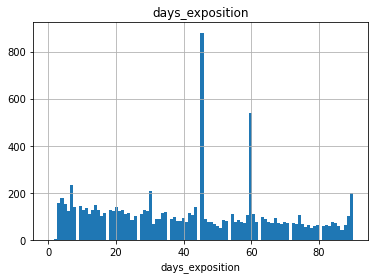

In [21]:
print(data['days_exposition'].value_counts().head(10)) # просмотрим как часто повторяется каждое значение в столбце
fig, ax = plt.subplots()
data['days_exposition'].hist(bins=100, range= (0,90))
ax.set_xlabel('days_exposition')
ax.set_title('days_exposition')

По графику и таблице видно, что выбиваются значения 7, 30, 45, 60, 90.
Значение 0, как было озвучено ранее, говорит нам о том, что это действующее объявление, т.е. продажа не совершилась. Либо же  объявление было закрыто в день его подачи. Вероятность того, что продажа совершилась в тот же день, что и подано объявление крайне мала.
Наличие таких высоких значений 7, 30, 45, 60, 90 позволяет предположить о возможных манипуляциях со стороны продавцов, совершаемых систематически: еженедельно(раз в 7 дней), ежемесячно(каждые 30 дней), каждые 1,5 месяца (спустя 45 дней), каждые 2,3 месяца (60 и 90 дней). Поэтому эти значения могут оказывать негативное влияине наши показатели.
Создадим новую таблицу "days_exposition_filtered", исключив из выборки эти 6 значений.
Построим гистограмму.

Text(0.5, 1.0, 'days_exposition')

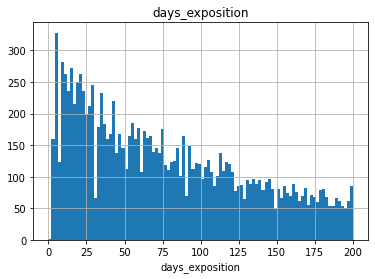

In [22]:
data_filtered = data.query('days_exposition != 0 and \
                                      days_exposition != 7 and \
                                      days_exposition != 30 and \
                                      days_exposition != 45 and \
                                      days_exposition != 60 and \
                                      days_exposition != 90 ')
fig, ax = plt.subplots()
data_filtered['days_exposition'].hist(bins=100, range= (0,200)) # проверяем отстутвие значений
ax.set_xlabel('days_exposition')
ax.set_title('days_exposition')

Выбивающиеся значения устранены, для отсева редких значений построим "ящик с усами"

count    18380.000000
mean       195.844342
std        226.727016
min          1.000000
25%         44.000000
50%        114.000000
75%        259.000000
max       1580.000000
Name: days_exposition, dtype: float64


<AxesSubplot:>

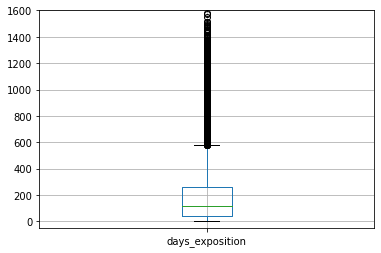

In [23]:
print(data_filtered['days_exposition'].describe()) 
plt.ylim(-50, 1600)
data_filtered.boxplot('days_exposition')

Определим межквартильный размах по формуле:
IQR = Q3-Q1. 

Границy правого "уса" найдем так: Q3 + 1,5 * IQR.
Значения, которые будут больше этой границы, можно считать выбросом и убрать из выборки

In [24]:
data_filtered_stats = data_filtered['days_exposition'].describe()
IQR = data_filtered_stats['75%'] - data_filtered_stats['25%']
right_edge = data_filtered_stats['75%']+ 1.5*IQR
print('Необходимо отсечь все значения более',right_edge)

Необходимо отсечь все значения более 581.5


count    17094.000000
mean       147.809056
std        137.521007
min          1.000000
25%         41.000000
50%        102.000000
75%        212.000000
max        581.000000
Name: days_exposition, dtype: float64
4     176
3     157
5     152
14    147
9     143
Name: days_exposition, dtype: Int64


Text(0.5, 1.0, 'days_exposition')

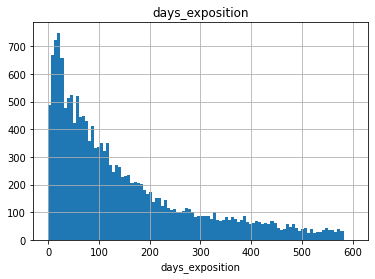

In [25]:
data_filtered = data_filtered.query('days_exposition <= @right_edge')
print(data_filtered['days_exposition'].describe())
print(data_filtered['days_exposition'].value_counts().head())
fig, ax = plt.subplots()
data_filtered['days_exposition'].hist(bins=100, range= (0,600))
ax.set_xlabel('days_exposition')
ax.set_title('days_exposition')

Теперь мы можм уверенно сказать, что обычно продажа совершается в промежутке от 41 до 212 дней(от полутора до 7 месяцев).

Теперь в получившейся таблице **data_filtered** последовательно уберем редкие значения из столбцов: **'total_area', 'last_price', 'rooms', 'ceiling_height'.**

**Уберем редкие значения из столбцов 'total_area'**

count    17094.000000
mean        58.270438
std         33.615029
min         12.000000
25%         39.200000
50%         50.100000
75%         67.000000
max        900.000000
Name: total_area, dtype: float64


<AxesSubplot:>

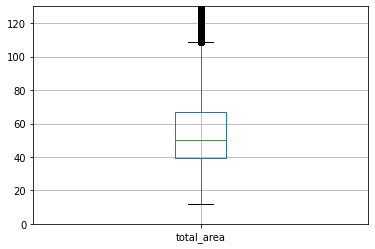

In [26]:
print(data_filtered['total_area'].describe()) 
plt.ylim(0, 130)
data_filtered.boxplot('total_area')

Определим межквартильный размах и значение границы правого "уса":

In [27]:
data_filtered_stats = data_filtered['total_area'].describe()
IQR = data_filtered_stats['75%'] - data_filtered_stats['25%']
right_edge = data_filtered_stats['75%']+ 1.5*IQR
print('Необходимо отсечь все значения более',right_edge)

Необходимо отсечь все значения более 108.69999999999999


count    16238.000000
mean        52.871937
std         18.221000
min         12.000000
25%         38.800000
50%         48.855000
75%         63.800000
max        108.600000
Name: total_area, dtype: float64
45.0    333
42.0    281
31.0    271
44.0    256
60.0    245
Name: total_area, dtype: int64


Text(0.5, 1.0, 'total_area')

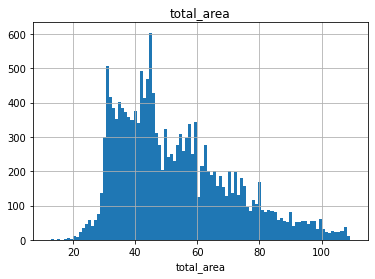

In [28]:
data_filtered = data_filtered.query('total_area <= @right_edge')
print(data_filtered['total_area'].describe())
print(data_filtered['total_area'].value_counts().head())
fig, ax = plt.subplots()
data_filtered['total_area'].hist(bins=100, range= (12,110))
ax.set_xlabel('total_area')
ax.set_title('total_area')

Наиболее часто продаваемые квартиры - квартиры с общей площадью 45 кв. метров. Часто продаются квартиры с площадью в диапазоне от 39 до 67 кв.м.

**Уберем редкие значения из столбцов 'last_price'**

count    1.623800e+04
mean     5.059965e+06
std      2.911837e+06
min      4.300000e+05
25%      3.350000e+06
50%      4.400000e+06
75%      6.000000e+06
max      5.300000e+07
Name: last_price, dtype: float64


<AxesSubplot:>

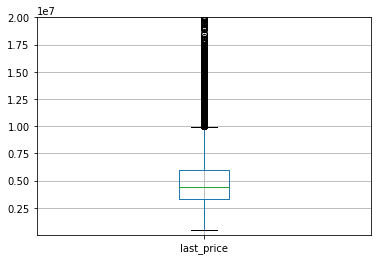

In [29]:
print(data_filtered['last_price'].describe()) 
plt.ylim(10000, 2.00000e+07)
data_filtered.boxplot('last_price')

Определим межквартильный размах и значение границы правого "уса":

In [30]:
data_filtered_stats = data_filtered['last_price'].describe()
IQR = data_filtered_stats['75%'] - data_filtered_stats['25%']
right_edge = data_filtered_stats['75%']+ 1.5*IQR
print('Необходимо отсечь все значения более',right_edge)

Необходимо отсечь все значения более 9975000.0


count    1.533700e+04
mean     4.567589e+06
std      1.862068e+06
min      4.300000e+05
25%      3.300000e+06
50%      4.250000e+06
75%      5.645078e+06
max      9.975000e+06
Name: last_price, dtype: float64
4500000    258
3500000    219
4200000    205
4000000    203
3600000    193
Name: last_price, dtype: Int64


Text(0.5, 1.0, 'last_price')

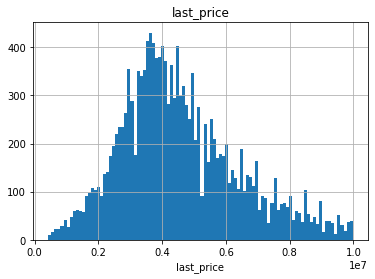

In [31]:
data_filtered = data_filtered.query('last_price <= @right_edge')
print(data_filtered['last_price'].describe())
print(data_filtered['last_price'].value_counts().head())
fig, ax = plt.subplots()
data_filtered['last_price'].hist(bins=100, range= ( 4.300000e+05,9.975000e+06))
ax.set_xlabel('last_price')
ax.set_title('last_price')

Самая распространенная цена квартиры лежит в диапазоне от 3,3 млн. руб. до 5,6 млн. руб.

**Уберем редкие значения из столбцов 'rooms'**

count    15337.000000
mean         1.852122
std          0.865145
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          6.000000
Name: rooms, dtype: float64


<AxesSubplot:>

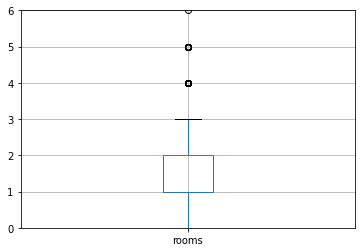

In [32]:
print(data_filtered['rooms'].describe()) # просмотрим, как часто повторяется каждое значение в столбце
plt.ylim(0, 6)
data_filtered.boxplot('rooms')

In [33]:
data_filtered_stats = data_filtered['rooms'].describe()
IQR = data_filtered_stats['75%'] - data_filtered_stats['25%']
right_edge = data_filtered_stats['75%']+ 1.5*IQR
print('Необходимо отсечь все значения более',right_edge)

Необходимо отсечь все значения более 3.5


count    14898.000000
mean         1.786750
std          0.786862
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: rooms, dtype: float64
1    6098
2    5438
3    3215
0     147
Name: rooms, dtype: int64


Text(0.5, 1.0, 'days_exposition')

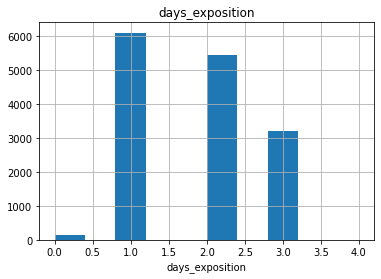

In [34]:
data_filtered = data_filtered.query('rooms <= @right_edge')
print(data_filtered['rooms'].describe())
print(data_filtered['rooms'].value_counts().head())
fig, ax = plt.subplots()
data_filtered['rooms'].hist(bins=10, range=( 0,4))
ax.set_xlabel('days_exposition')
ax.set_title('days_exposition')

Самые продаваемые квартиры - 1-комнатные

**Уберем редкие значения из столбцов 'ceiling_height'**

count    14623.000000
mean         2.697281
std          0.781688
min          1.000000
25%          2.550000
50%          2.600000
75%          2.750000
max         27.500000
Name: ceiling_height, dtype: float64


<AxesSubplot:>

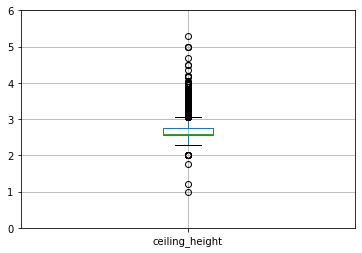

In [35]:
print(data_filtered['ceiling_height'].describe())
plt.ylim(0, 6)
data_filtered.boxplot('ceiling_height')

Перед определением значений выбросов, необходимо отсеить некорректную высоту потолков, минимальная высота потолков в России 2,48 м.

In [36]:
data_filtered_stats = data_filtered['ceiling_height'].describe()
IQR = data_filtered_stats['75%'] - data_filtered_stats['25%']
right_edge = data_filtered_stats['75%']+ 1.5*IQR
print('Необходимо отсечь все значения более',right_edge.round(0))

Необходимо отсечь все значения более 3.0


При отсеве значений выбросов, необходимо учесть наличие некорректных  значений высоты потолков. Минимальная высота потолков в России составляет 2,48 м. Отсечем все значения менее 2,48 м

count    14014.000000
mean         2.646111
std          0.130463
min          2.480000
25%          2.550000
50%          2.600000
75%          2.700000
max          3.050000
Name: ceiling_height, dtype: float64
2.50    2860
2.60    2422
2.70    2026
2.55    1515
2.75    1404
Name: ceiling_height, dtype: int64


Text(0.5, 1.0, 'days_exposition')

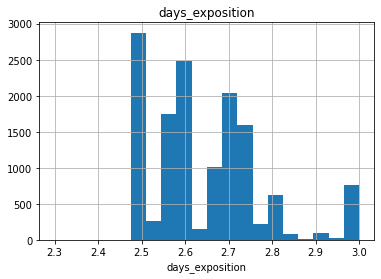

In [37]:
data_filtered = data_filtered.query('ceiling_height <= @right_edge & ceiling_height >= 2.48 ')
print(data_filtered['ceiling_height'].describe())
print(data_filtered['ceiling_height'].value_counts().head())
fig, ax = plt.subplots()
data_filtered['ceiling_height'].hist(bins=20, range=( 2.3,3))
ax.set_xlabel('days_exposition')
ax.set_title('days_exposition')

 Высота потолков самых продаваемых квартир лежит в диапазоне от 2,55 до 2,75 м
 
Впереди нам предстоит изучить стоимость квартир от различных показателей, будет кстати, если мы проведем отсев лишних значений столбца **стоимость квадратного метра**(price_square_meter):

count     14014.000000
mean      91623.844875
std       27160.231212
min        9615.384615
25%       75949.367089
50%       92244.720663
75%      107335.178124
max      312240.000000
Name: price_square_meter, dtype: float64


<AxesSubplot:>

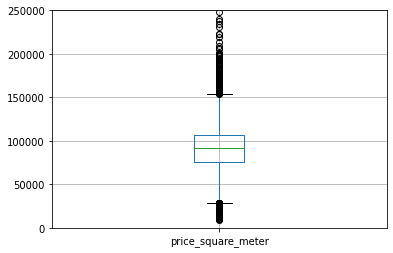

In [38]:
print(data_filtered['price_square_meter'].describe())
plt.ylim(0, 250000)
data_filtered.boxplot('price_square_meter')

In [39]:
data_filtered_stats = data_filtered['price_square_meter'].describe()
IQR = data_filtered_stats['75%'] - data_filtered_stats['25%']
right_edge = data_filtered_stats['75%']+ 1.5*IQR
print('Необходимо отсечь все значения более',right_edge)

Необходимо отсечь все значения более 154413.89467781023


count     13812.000000
mean      90404.381292
std       25231.638853
min        9615.384615
25%       75581.395349
50%       91898.772364
75%      106521.739130
max      154385.964912
Name: price_square_meter, dtype: float64
100000.000000    174
83333.333333      41
75000.000000      41
80000.000000      36
66666.666667      36
Name: price_square_meter, dtype: Int64


Text(0.5, 1.0, 'days_exposition')

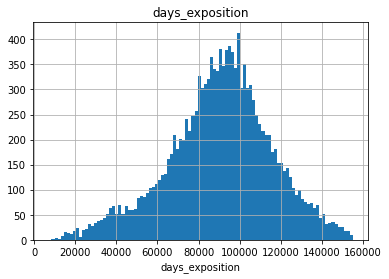

In [40]:
data_filtered = data_filtered.query('price_square_meter <= @right_edge')
print(data_filtered['price_square_meter'].describe())
print(data_filtered['price_square_meter'].value_counts().head())
fig, ax = plt.subplots()
data_filtered['price_square_meter'].hist(bins=100, range=( 7000,155000))
ax.set_xlabel('days_exposition')
ax.set_title('days_exposition')

Стоимость 1 квадратного метра лежит в диапазоне от 75,6 тыс до 106,5 тыс. рублей

**Определим какие факторы больше всего влияют на стоимость квартиры.**

Для этого изучим зависимость цены квадратного метра (price_square_meter) от :
 - площади(total_area) , 
 - числа комнат (rooms)
 - удалённости от центра(city_centers_nearest). 
 - того, на каком этаже расположена квартира: первом, последнем или другом(flat_floor). 
 - даты размещения: дня недели, месяца и года(week_day,	month, yeaer).
 
 
 **Зависимость цены квадратного метра от общей площади:**

<AxesSubplot:xlabel='total_area', ylabel='price_square_meter'>

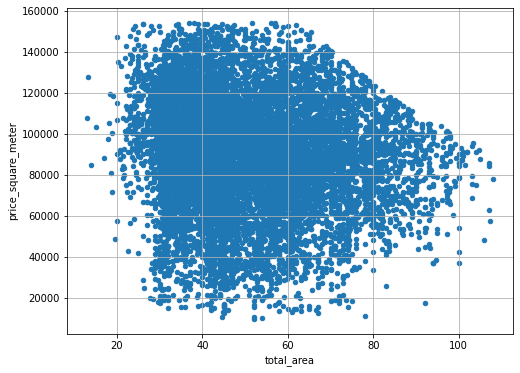

In [41]:
#print(data_filtered['price_square_meter'].corr(data_filtered['total_area'])) # определим коэффициент Пирсона
data_filtered.plot(x='total_area',y='price_square_meter', kind='scatter', figsize=(8, 6), grid=True)  # построим диаграмму рассеяния

Коэффициет Пирсона отрицателен, зависимость слабая,  при увеличении площади квартиры стоимость квадратного метра снижается.

**Зависимость цены квадратного метра от количества комнат:**

<AxesSubplot:xlabel='rooms'>

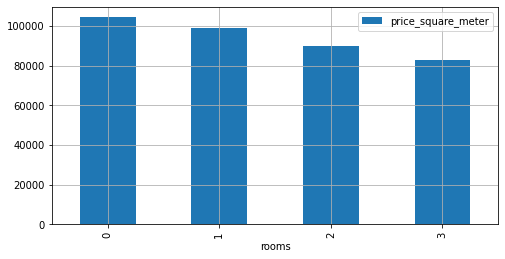

In [42]:
#print(data_filtered['price_square_meter'].corr(data_filtered['rooms'])) # определим коэффициент Пирсона
(data_filtered.pivot_table(index='rooms', values='price_square_meter',aggfunc='median') # для выбранных значений применим сводную таблицу, подсчтиав медиану, и выведем результат в виде столбчатой диаграммы
.plot(kind='bar',figsize=(8, 4), grid=True))

Коэффициет Пирсона отрицателен. Чем меньше комнат в квартире, тем выше стоимость квадратного метра. Самая высокая стоимсть у квартир со свободной планировкой.

**Зависимость цены квадратного метра от удалённости от центра:**

<AxesSubplot:xlabel='city_centers_nearest', ylabel='price_square_meter'>

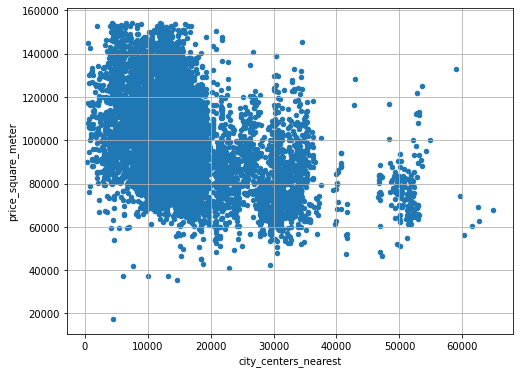

In [43]:
#print(data_filtered['price_square_meter'].corr(data_filtered['city_centers_nearest']))  # определим коэффициент Пирсона
data_filtered.plot(x='city_centers_nearest',y='price_square_meter', kind='scatter',figsize=(8, 6), grid=True)

Чем дальше квартира от центра тем стоимость кваратного метра ниже.
 
 **Зависимость цены квадратного метра от того, на каком этаже расположена квартира: первом, последнем или другом():**

<AxesSubplot:xlabel='flat_floor'>

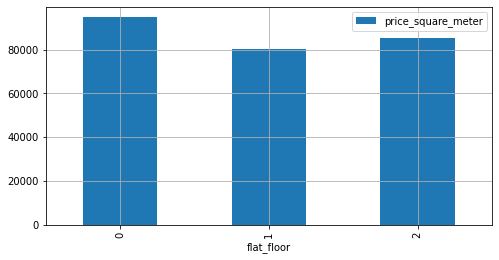

In [44]:
#print(data_filtered['price_square_meter'].corr(data_filtered['flat_floor'])) # определим коэффициент Пирсона
(data_filtered.pivot_table(index='flat_floor', values='price_square_meter',aggfunc='median') # для выбранных значений применим сводную таблицу, подсчтиав медиану, и выведем результат в виде столбчатой диаграммы
 .plot(kind='bar', figsize=(8, 4), grid=True))

Коэффициент Пирсона отрицательный, значит при увеличении показателя этажности стоимость квадратного метра уменьшается, а в нашем случае(учитывая, что 1- кваритры на 1 этаже, 2 -  на последнем этаже, 0 - на других этажах квартиры) квартиры, находящиеся на первых и последних этажах стоят дешевле нежели на других этажах, при чем cамая доступная цена у квартир, находящихся на 1х этажах.

 **Зависимость цены квадратного метра от даты размещения: дня недели, месяца и года(week_day,month, year):**

<AxesSubplot:xlabel='week_day'>

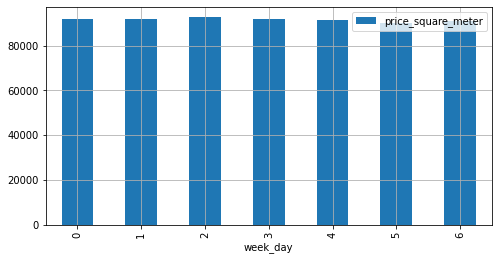

In [45]:
#print(data_filtered['price_square_meter'].corr(data_filtered['week_day'])) # определим коэффициент Пирсона
(data_filtered.pivot_table(index='week_day', values='price_square_meter',aggfunc='median') # для выбранных значений применим сводную таблицу, подсчтиав медиану, и выведем результат в виде столбчатой диаграммы
 .plot(kind='bar', figsize=(8, 4), grid=True))

Коэффициент Пирсона близок к нулю и по диаграмме видно, что зависимости цены квадратного метра от дня недели, в котором было  размещено объявление, практически нет. 

<AxesSubplot:xlabel='month'>

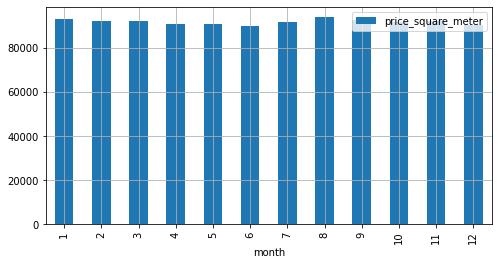

In [46]:
#print(data_filtered['price_square_meter'].corr(data_filtered['month'])) # определим коэффициент Пирсона
(data_filtered.pivot_table(index='month', values='price_square_meter',aggfunc='median') # для выбранных значений применим сводную таблицу, подсчтиав медиану, и выведем результат в виде столбчатой диаграммы
 .plot(kind='bar', figsize=(8, 4), grid=True))

Коэффициент Пирсона близок к нулю и по диаграмме видно, что зависимости цены квадратного метра от месяца, в котором было  размещено объявление, практически нет. 

<AxesSubplot:xlabel='year'>

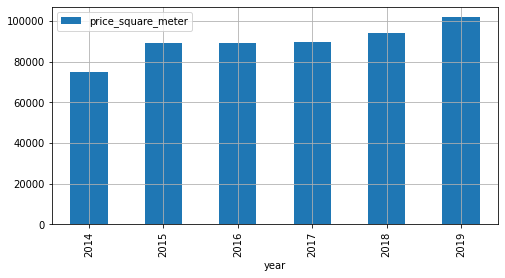

In [47]:
#print(data_filtered['price_square_meter'].corr(data_filtered['year'])) # определим коэффициент Пирсона
(data_filtered.pivot_table(index='year', values='price_square_meter',aggfunc='median') # для выбранных значений применим сводную таблицу, подсчтиав медиану, и выведем результат в виде столбчатой диаграммы
 .plot(kind='bar', figsize=(8, 4), grid=True))

Коэффициент Пирсона положительный, но его значеение не велико, зависимость слабая, однако из диграммы мы видим, что стоимость квадратного метра имеет тендецию к росту с каждый годом.

Построим тепловую карту матрицы корреляции всего отфильтрованного датафрейма.

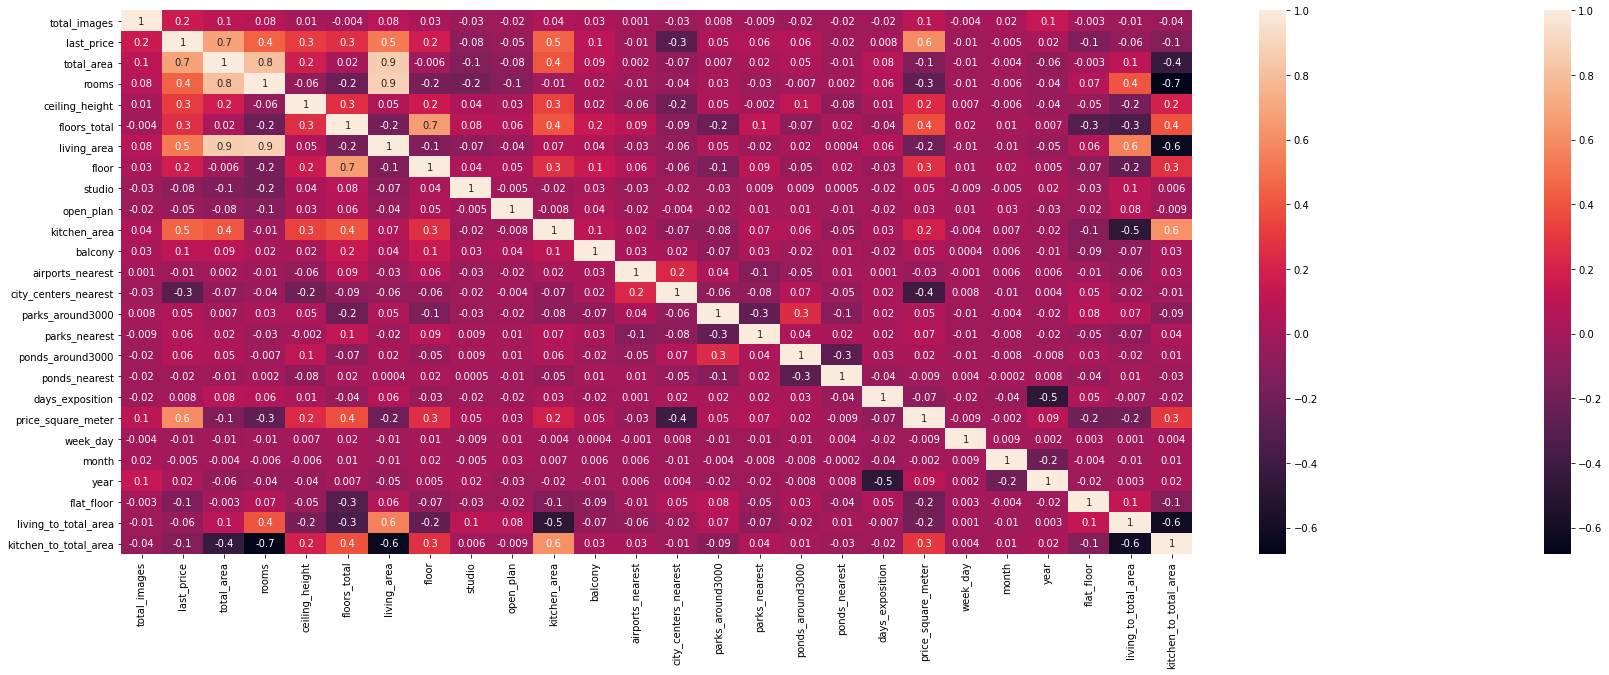

In [48]:
plt.figure(figsize=(30, 10))
heatmap_data_filtered = seaborn.heatmap(data_filtered.corr())
heatmap_data_filtered = seaborn.heatmap(data_filtered.corr(), annot=True, fmt = '.1g') 

Так по данным тепловой карты можем определить, что стоимость квадратного метра:
    
- имеет положительную зависимоть от: цены, этажности дома, этажа квартиры, площади кухни.
- имеет обратную зависить от количества комнат, жилой площади и удаленности квартиры от центра города



**Анализ 10 населенных пунктов с наибольшим числом объявлений.**

Найдем 10 населённых пунктов с наибольшим числом объявлений и посчитайтем среднюю цену квадратного метра в этих населённых пунктах. Населённые пункты с самой высокой и низкой стоимостью жилья выделим отдельно.

In [49]:
top10 = data.pivot_table(index='locality_name', values='price_square_meter',aggfunc=['count','mean']).sort_values(('count','price_square_meter'),ascending=False).head(10)
display(top10) # отобразим таблицу с 10 НП с наибольшим числом объявлений
print('Населённый пункт с самой высокой стоимостью жилья:',top10.index[0])
print('Населённый пункт с самой низкой стоимостью жилья:',top10.index[9])

,count,mean
,price_square_meter,price_square_meter
locality_name,,
Санкт-Петербург,15651,114868.877341
Мурино,586,86041.116064
Кудрово,470,95260.846171
Шушары,439,78551.344545
Всеволожск,398,68654.473986
Пушкин,369,103125.819291
Колпино,338,75424.579098
Парголово,327,90175.913458


Населённый пункт с самой высокой стоимостью жилья: Санкт-Петербург
Населённый пункт с самой низкой стоимостью жилья: Выборг


Теперь отобразим топ первых 10 населенных пунктов с самой дорогой средней ценой квадратного метра.

<AxesSubplot:title={'center':'Средняя цена 1 квадратного метра, руб.'}, xlabel='locality_name'>

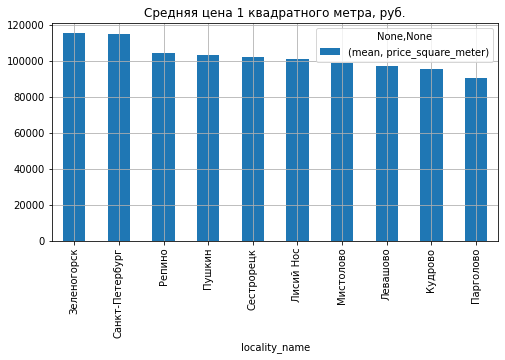

In [50]:
(data.pivot_table(index='locality_name', values='price_square_meter',aggfunc=['mean']).sort_values(('mean','price_square_meter'),ascending=False).head(10).plot(kind='bar', figsize=(8, 4), grid=True, title='Средняя цена 1 квадратного метра, руб.'))

Оказывается самая дорогая недвижимость не в Санкт-Петербурге, а в г. Зеленогорске!
    
Теперь отобразим топ первых 10 населенных пунктов с самой недорогой средней ценой квадратного метра

<AxesSubplot:title={'center':'Средняя цена 1 квадратного метра, руб.'}, xlabel='locality_name'>

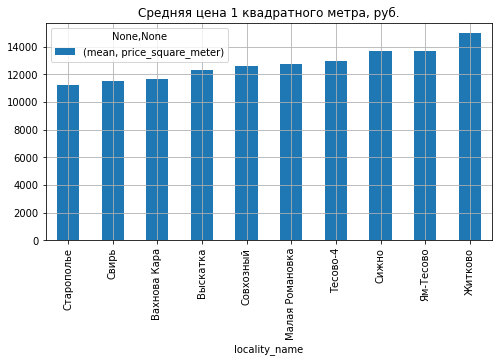

In [51]:
(data.pivot_table(index='locality_name', values='price_square_meter',aggfunc=['mean']).sort_values(('mean','price_square_meter')).head(10).plot(kind='bar', figsize=(8, 4), grid=True, title='Средняя цена 1 квадратного метра, руб.'))

**Анализ изменения цены по степени удаленности от центра**

Выделим квартиры в Санкт Петербурге в отдельную таблицу, в ней создадим столбец с расстоянием до центра в километрах, округлив значения до целых чисел. Посчитаем среднюю цену для каждого километра. Построим график: он должен показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется, — это и будет центральная зона.

/tmp/ipykernel_367/1784260920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_spb['km_to_center'] =data_spb['city_centers_nearest']/1000
/tmp/ipykernel_367/1784260920.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_spb['km_to_center'] = data_spb['km_to_center'].round(0)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_square_meter,week_day,month,year,flat_floor,living_to_total_area,kitchen_to_total_area,km_to_center
2,10,5196000,56.0,2015-08-20,2,2.60,5,34.3,4,False,...,574,558,92785.714286,3,8,2015,0,0.612500,0.148214,14.0
9,18,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,False,...,<NA>,289,88524.590164,6,2,2017,0,0.714754,0.106557,15.0
10,5,5050000,39.6,2017-11-16,1,2.67,12,20.3,3,False,...,553,137,127525.252525,3,11,2017,0,0.512626,0.214646,14.0
15,16,4650000,39.0,2017-11-18,1,2.60,14,20.5,5,False,...,296,19,119230.769231,5,11,2017,0,0.525641,0.194872,14.0
16,11,6700000,82.0,2017-11-23,3,3.05,5,55.6,1,False,...,<NA>,397,81707.317073,3,11,2017,1,0.678049,0.109756,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23687,6,3200000,39.0,2017-12-16,1,2.55,9,20.0,6,False,...,<NA>,38,82051.282051,5,12,2017,0,0.512821,0.282051,17.0
23688,19,9200000,101.0,2019-04-01,3,3.05,15,63.0,12,False,...,<NA>,23,91089.108911,0,4,2019,0,0.623762,0.148515,14.0
23689,13,3550000,35.3,2018-02-28,1,2.86,15,16.3,4,False,...,652,29,100566.572238,2,2,2018,0,0.461756,0.257790,16.0
23690,3,5500000,52.0,2018-07-19,2,2.60,5,31.0,2,False,...,<NA>,15,105769.230769,3,7,2018,0,0.596154,0.115385,6.0


<AxesSubplot:xlabel='km_to_center'>

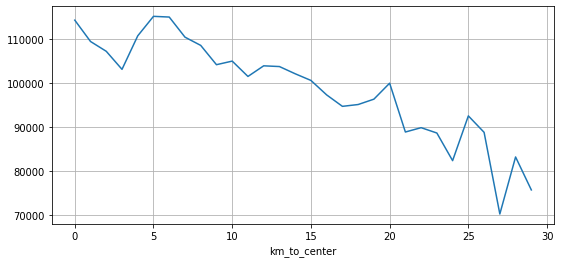

In [52]:
data_spb = data_filtered.query('locality_name == "Санкт-Петербург"')
data_spb['km_to_center'] =data_spb['city_centers_nearest']/1000
data_spb['km_to_center'] = data_spb['km_to_center'].round(0)
display(data_spb)
pd.set_option('chained_assignment', None)
data_spb.groupby('km_to_center')['price_square_meter'].mean().plot(grid=True, figsize=(9,4))


Пиковое значение на графике 6 км, скорее всего, это и есть граница центра города, т.к после 6 км цена кв.м снижается.

Выделяем сегмент квартир в центре. Проанализируем эту территорию, изучив следующие параметры: площадь, цена, число комнат, высота потолков. Далее выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

count    479.000000
mean      60.862234
std       17.741465
min       13.200000
25%       47.000000
50%       61.000000
75%       72.450000
max      107.000000
Name: total_area, dtype: float64
60.0    12
50.0    11
70.0     9
80.0     9
64.0     9
Name: total_area, dtype: int64


Text(0.5, 1.0, 'total_area')

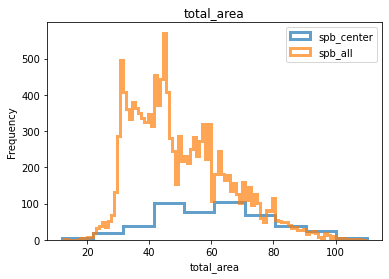

In [53]:
data_spb_center = data_spb.query('km_to_center < 6')
print(data_spb_center['total_area'].describe())
print(data_spb_center['total_area'].value_counts().head())
ax = data_spb_center['total_area'].plot(
    kind='hist',
    histtype='step', 
    bins=10, 
    range= (12,110),
    linewidth=3,
    alpha=0.7,
    label='spb_center',
    legend=True
    
)
data_filtered['total_area'].plot(
    kind='hist',
    histtype='step',
    bins=100, 
    range= (12,110),
    ax=ax,
    linewidth=3,
    alpha=0.7,
    label='spb_all',
    legend=True
)
ax.set_xlabel('total_area')
ax.set_title('total_area')

В центре часто продаваемые квартиры - квартиры с с большей общей площадью - в 60 кв. метров. Диапазон наиболее часто продающихся квартир также увеличился: от 47 до 72 кв.м.

count    4.790000e+02
mean     6.553927e+06
std      1.700945e+06
min      1.600000e+06
25%      5.300000e+06
50%      6.500000e+06
75%      7.800000e+06
max      9.950000e+06
Name: last_price, dtype: float64
6500000    11
8500000    11
5300000    10
6700000    10
5000000     9
Name: last_price, dtype: Int64


Text(0.5, 1.0, 'last_price')

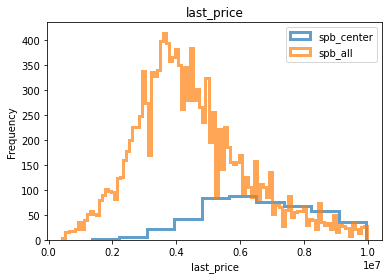

In [54]:
print(data_spb_center['last_price'].describe())
print(data_spb_center['last_price'].value_counts().head())
ax = data_spb_center['last_price'].plot(
    kind='hist',
    histtype='step', 
    bins=10, 
    range= (1.350000e+06,9.960000e+06),
    linewidth=3,
    alpha=0.7,
    label='spb_center',
    legend=True
    
)

data_filtered['last_price'].plot(
    kind='hist',
    histtype='step',
    bins=100, 
    range= (4.300000e+05,9.975000e+06),
    ax=ax,
    linewidth=3,
    alpha=0.7,
    label='spb_all',
    legend=True
)
ax.set_xlabel('last_price')
ax.set_title('last_price')

Цена квартиры в центре заметно приросла, средняя цена изменилась почти на 2 млн. руб. и составляет 6,5 млн руб.

count    479.000000
mean       2.139875
std        0.748259
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: rooms, dtype: float64
2    202
3    172
1    105
Name: rooms, dtype: int64


Text(0.5, 1.0, 'rooms')

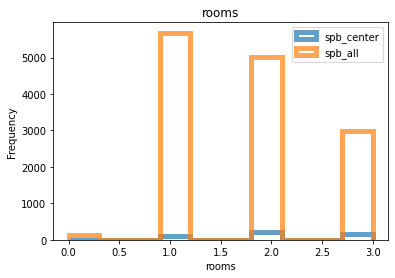

In [55]:
print(data_spb_center['rooms'].describe())
print(data_spb_center['rooms'].value_counts().head())
ax= data_spb_center['rooms'].plot(
    kind='hist',
    histtype='step', 
    bins=10, 
    range= (0,3),
    linewidth=5,
    alpha=0.7,
    label='spb_center',
    legend=True
)

data_filtered['rooms'].plot(
    kind='hist',
    histtype='step',
    bins=10, 
    range= (0,3),
    ax=ax,
    linewidth=5,
    alpha=0.7,
    label='spb_all',
    legend=True
)
ax.set_xlabel('rooms')
ax.set_title('rooms')

В центре самые продаваемые квартиры  - 2 -комнатные, после них 3х-комнатые.

count    479.000000
mean       2.802109
std        0.178603
min        2.500000
25%        2.600000
50%        2.800000
75%        3.000000
max        3.050000
Name: ceiling_height, dtype: float64
3.00    169
2.60    113
2.80     31
2.70     29
2.75     29
Name: ceiling_height, dtype: int64


Text(0.5, 1.0, 'ceiling_height')

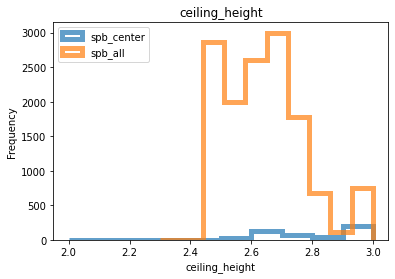

In [56]:
print(data_spb_center['ceiling_height'].describe())
print(data_spb_center['ceiling_height'].value_counts().head())
ax = data_spb_center['ceiling_height'].plot(
    kind='hist',
    histtype='step', 
    bins=10, 
    range= (2,3),
    linewidth=5,
    alpha=0.7,
    label='spb_center',
    legend=True
)
data_filtered['ceiling_height'].plot(
    kind='hist',
    histtype='step',
    bins=10, 
    range= (2.3,3),
    ax=ax,
    linewidth=5,
    alpha=0.7,
    label='spb_all',
    legend=True
)
ax.set_xlabel('ceiling_height')
ax.set_title('ceiling_height')

В центре Санкт-Петербурга большинство квартир имеет 3х метровые потолки

Теперь определим зависимость стоимости квартир от следующих факторов: число комнат, этаж, удалённость от центра, дата размещения объявления.

<AxesSubplot:title={'center':'spb'}, xlabel='rooms'>

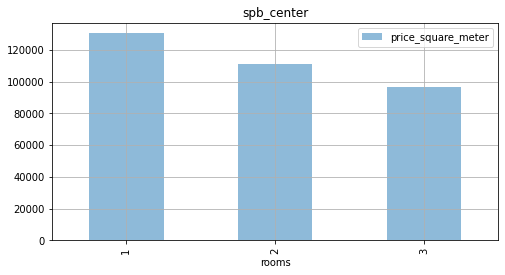

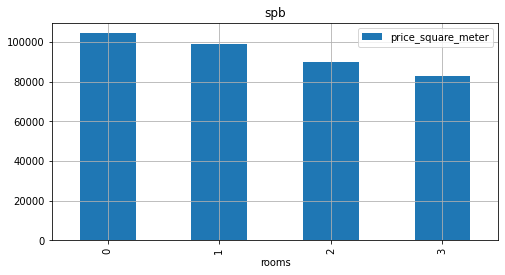

In [57]:
(data_spb_center.pivot_table(index='rooms', values='price_square_meter',aggfunc='median') 
.plot(kind='bar',figsize=(8, 4), grid=True, alpha = 0.5,title='spb_center'))
#print(" Корреляция в центре СПБ = ",data_spb_center['price_square_meter'].corr(data_filtered['rooms'])) # определим коэффициент Пирсона
#print(" Корреляция в СПБ = ",data_filtered['price_square_meter'].corr(data_filtered['rooms'])) # определим коэффициент Пирсона
(data_filtered.pivot_table(index='rooms', values='price_square_meter',aggfunc='median') 
.plot(kind='bar',figsize=(8, 4), grid=True, title='spb'))

В центре самая дорогая цена за кв.м. жилья - в 1 комнатных квартирах. Обратная зависимость стоимости квадратного метра от количества комнат в центре Санкт-Петербрурга сильнее нежели, чем во всем городе.

<AxesSubplot:title={'center':'spb'}, xlabel='flat_floor'>

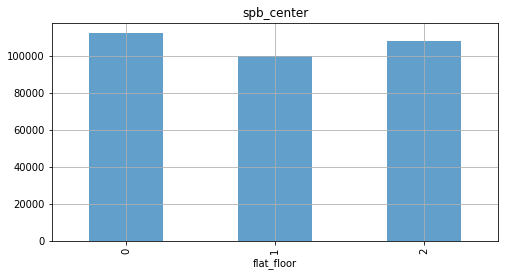

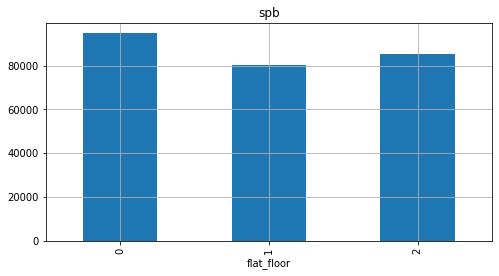

In [58]:
(data_spb_center.pivot_table(index='flat_floor', values='price_square_meter',aggfunc='median')
.plot(kind='bar',figsize=(8, 4), grid=True, legend=False,alpha=0.7, title = 'spb_center' ))
#print(" Корреляция в центре СПБ = ",data_spb_center['price_square_meter'].corr(data_filtered['flat_floor'])) # определим коэффициент Пирсона
#print(" Корреляция в СПБ = ",data_filtered['price_square_meter'].corr(data_filtered['flat_floor'])) # определим коэффициент Пирсона
(data_filtered.pivot_table(index='flat_floor', values='price_square_meter',aggfunc='median')
.plot(kind='bar',figsize=(8, 4), grid=True, legend=False, title = 'spb'))

Точно также квартиры в центре, находящиеся на первых и последних этажах стоят дешевле нежели на других этажах, при чем cамая доступная цена у квартир, находящихся на 1х этажах. Стоит отметить, что цены на последние этажи достаточно высоки, это наверняка связано  с видовыми характеристиками квартир в центре города и знаменитыми крышами Питера.

<AxesSubplot:title={'center':'spb'}, xlabel='city_centers_nearest', ylabel='price_square_meter'>

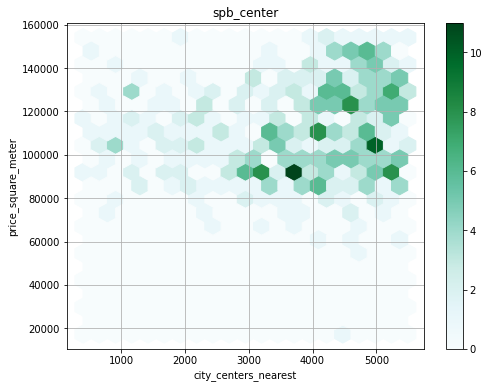

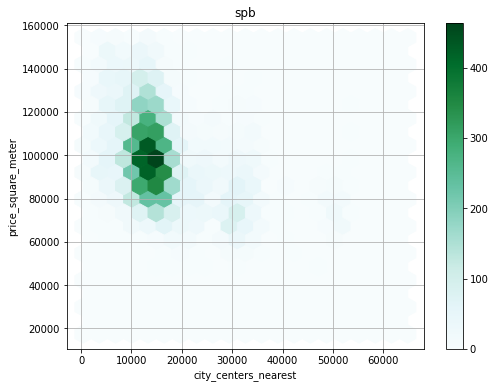

In [59]:
data_spb_center.plot(
    x='city_centers_nearest',
    y='price_square_meter', 
    kind='hexbin', 
    gridsize=20, 
    sharex=False, 
    figsize=(8, 6), 
    grid=True,
    title = 'spb_center'
)
#print(" Корреляция в центре СПБ = ",data_spb_center['price_square_meter'].corr(data_filtered['city_centers_nearest'])) # определим коэффициент Пирсона
#print(" Корреляция в СПБ = ",data_filtered['price_square_meter'].corr(data_filtered['city_centers_nearest'])) 
data_filtered.plot(
    x='city_centers_nearest',
    y='price_square_meter', 
    kind='hexbin', 
    gridsize=20, 
    sharex=False, 
    figsize=(8, 6), 
    grid=True,
    title = 'spb'
)

В центре зависимость иная- чем дальше квартира от центра в пределах 4-6 км, тем стоимость кваратного метра выше. Это подтверджает положительная корреляция, не смотря на слабую зависимость.

<AxesSubplot:title={'center':'spb'}, xlabel='year'>

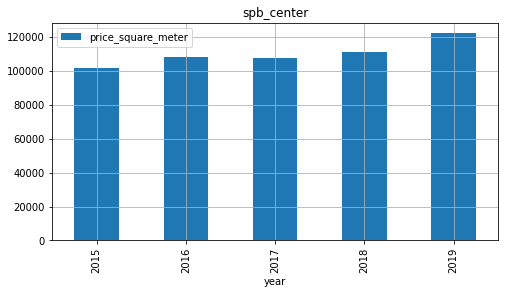

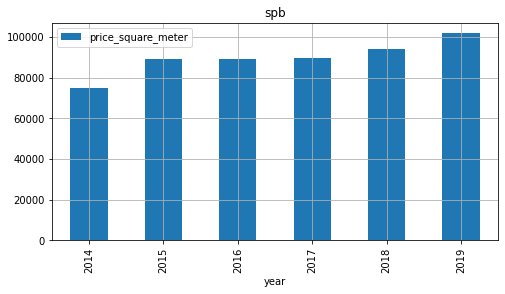

In [60]:
(data_spb_center.pivot_table(index='year', values='price_square_meter',aggfunc='median') # для выбранных значений применим сводную таблицу, подсчтиав медиану, и выведем результат в виде столбчатой диаграммы
 .plot(kind='bar', figsize=(8, 4), grid=True, title = 'spb_center'))
#print(" Корреляция в центре СПБ = ",data_spb_center['price_square_meter'].corr(data_filtered['year'])) # определим коэффициент Пирсона
#print(" Корреляция в СПБ = ",data_filtered['price_square_meter'].corr(data_filtered['year'])) 
(data_filtered.pivot_table(index='year', values='price_square_meter',aggfunc='median') # для выбранных значений применим сводную таблицу, подсчтиав медиану, и выведем результат в виде столбчатой диаграммы
 .plot(kind='bar', figsize=(8, 4), grid=True, title = 'spb'))

Цены на квартиры в центре Санкт-Петербурга, как и по всех остальных частях города за последние 5 лет имеют тенденцию к росту(корреляция положительная).

Корреляция для центра Санкт_петербурга посчитана, выводы дополнены. Для их подтверджения посторим тепловую карту матрицы корреляции для квартир в Центре Санкт-Петербурга:

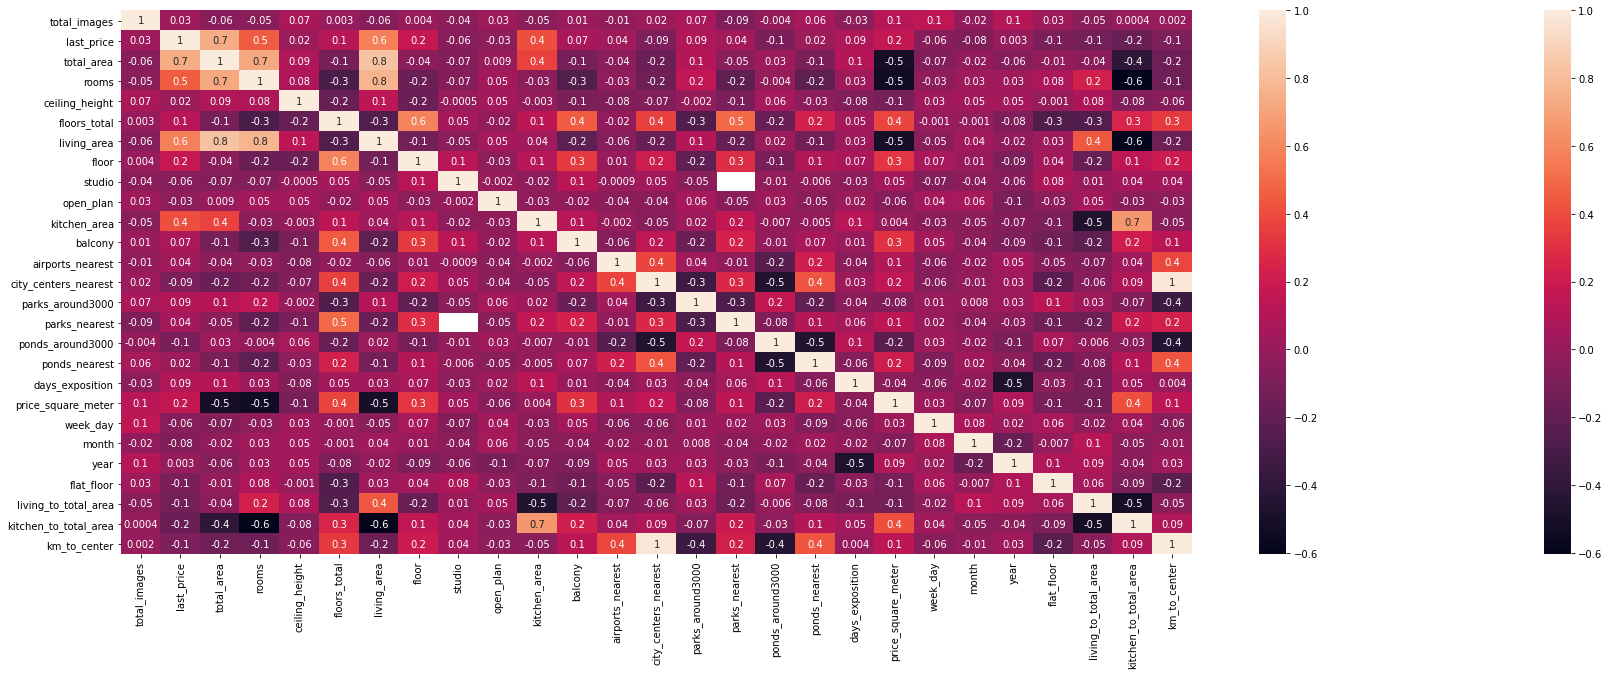

In [61]:
plt.figure(figsize=(30, 10))
heatmap_data_filtered = seaborn.heatmap(data_spb_center.corr())
heatmap_data_filtered = seaborn.heatmap(data_spb_center.corr(), annot=True, fmt = '.1g') 

Так по данным тепловой карты можем сделать вывод, что стоимость квадратного метра:
    
- имеет положительную зависимоть от: цены, этажности дома и этажа квартиры, наличия балкона, удаленности квартиры от центра города и наличия большой кухни(относительно общей площади квартиры)
- имеет обратную зависить от количества комнат, площади квартиры, наличия водоемов в радиусе 3 км.

## Общий вывод

 В ходе ислледования была обработана информация о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. В процессе обработки были устранены некоторые пропущенные значения, исключены редкие и выбивающиеся значения, введены новые показатели, в том числе позволяющие определить рыночную стоимость объектов недвижимости и выявить ее зависимость от различных факторов. 

  В результате получен ряд выводов:
  
- Самые продаваемые квартиры находятся не на первом и последнем этажах, и это, как правило, 1 комнатные квартиры.
- В центре Санкт-Петербурга популярны квартиры на последних этажах. 
- Также в центре квартиры чаще продаются с большей планировкой, нежели чем на окраинах и, в отличие от дргуих районов города и других городов, это квартиры двух и трех комнатные.
- Самые дорогие квартиры - это квартиры со свободной планировкой, за исключением центра Санкт-Петербурга, здесь самые дорогие - 1 комнатные квартиры. 
- Средняя стоимость квартиры в центре Санкт-Петербурга дороже  квартир в остальных районах города на 2 миллиона рублей. Совершенно очевидно, что чем дальше квартира от центра города, тем ее стоимость ниже. 
- Самая дорогая недвижимость по стоимости квадратного метра оказалась не в центре северной столицы, а в небольшом городе Зеленогорске, на берегу Финского залива. 
- В целом же за последние годы стоимость неджвижимости Санкт-Петербурге и в его пригородах имеет тенденцию к росту.